In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot

importing Jupyter notebook from histplot.ipynb


In [2]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [3]:
Summer17 = histplot.getData(17, direct, ASC, 197, 47, 6 , float)
Fall17 = histplot.getData(17, direct, ASC, 244, 91, 6, float)

Season17 = np.concatenate([Summer17, Fall17])

In [4]:
#2018
Winter18_1 = histplot.getData(17,direct, ASC, 335, 31, 6, float)
Winter18_2 = histplot.getData(18, direct, ASC, 1, 59, 6, float)
Spring18 = histplot.getData(18,direct, ASC, 60, 92,6, float)
Summer18 = histplot.getData(18, direct, ASC, 152, 92, 6 , float)
Fall18 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

Winter18 = np.concatenate([Winter18_1, Winter18_2])

Season18 = np.concatenate([Winter18, Spring18, Summer18, Fall18])

In [5]:
# 2019 
Winter19_1 = histplot.getData(18,direct, ASC, 335, 31, 6, float)
Winter19_2 = histplot.getData(19, direct, ASC, 1, 59, 6, float)
Spring19 = histplot.getData(19,direct, ASC, 60, 92,6, float)
Summer19 = histplot.getData(19, direct, ASC, 152, 92, 6 , float)
Fall19 = histplot.getData(19, direct, ASC, 244, 91, 6, float)

Winter19 = np.concatenate([Winter19_1, Winter19_2])

Season19 = np.concatenate([Winter19, Spring19, Summer19, Fall19])

In [6]:
#2020
Winter20_1 = histplot.getData(19,direct, ASC, 335, 31, 6, float)
Winter20_2 = histplot.getData(20, direct, ASC, 1, 60, 6, float)
Spring20 = histplot.getData(20,direct, ASC, 61, 92,6, float)
Summer20 = histplot.getData(20, direct, ASC, 153, 92, 6 , float)
Fall20 = histplot.getData(20, direct, ASC, 245, 91, 6, float)

Winter20 = np.concatenate([Winter20_1, Winter20_2])

Season20 = np.concatenate([Winter20, Spring20, Summer20, Fall20])

In [7]:
Su_precip17, Su_nonprecip17, Su_preciptotal17, Su_totalprep17 = histplot.preciphist(Summer17, len(Summer17), 5000, 1, 1)
Fprecip17, Fnonprecip17, Fpreciptotal17, Ftotalprep17 = histplot.preciphist(Fall17, len(Fall17), 5000, 1, 1)
precip17, nonprecip17, preciptotal17, totalprep17 = histplot.preciphist(Season17, len(Season17), 20000, 1, 1)


In [8]:
nonprecip17 = nonprecip17[nonprecip17 > 0]
nonprep17_100 = np.zeros(51)
for i in range(0, 51):
    nonprep17_100[i] =np.percentile(nonprecip17, i*2)
print(nonprep17_100)
nonprep17_98 = nonprep17_100[:50]
print(nonprep17_98)

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 4.0000e+00
 4.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00 8.0000e+00
 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01 2.0000e+01
 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02 2.4120e+02
 1.2352e+03 3.4692e+03 1.5394e+04]
[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 4.0000e+00
 4.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00 8.0000e+00
 9.0000e+00 1.0000e+01 1.10

In [9]:
#Wnonprecip17 = Wnonprecip17[Wnonprecip17>0]
#Sp_nonprecip17 = Sp_nonprecip17[Sp_nonprecip17>0]
Su_nonprecip17 = Su_nonprecip17[Su_nonprecip17>0]
Fnonprecip17 = Fnonprecip17[Fnonprecip17>0]

In [10]:
one_bin17_np100 = np.unique(nonprep17_100)
one_bin17_np98 = np.unique(nonprep17_98)
stop1 = np.array([1])
one_bin17_np100 = np.setdiff1d(one_bin17_np100, stop1)
one_bin17_np98 = np.setdiff1d(one_bin17_np98, stop1)
print(one_bin17_np100)
print(one_bin17_np98)
np_hist17_100, np_bin17_edge100 = np.histogram(nonprecip17, bins = one_bin17_np100)
np_hist17_98, np_bin17_edge98 = np.histogram(nonprecip17, bins = one_bin17_np98)
print(np_hist17_100)
print(np_hist17_98)

[2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00
 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01
 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02
 2.4120e+02 1.2352e+03 3.4692e+03 1.5394e+04]
[2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00
 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01
 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02
 2.4120e+02 1.2352e+03 3.4692e+03]
[105  59  33  29  26  14  19  14  14  27  16  19  17  18  18  17  19  18
  17  18  18]
[105  59  33  29  26  14  19  14  14  27  16  19  17  18  18  17  19  18
  17  18]


In [11]:
curve17_np100, bin17_val_np100 = histplot.calc(nonprecip17, one_bin17_np100)
print(curve17_np100)
print(bin17_val_np100)
curve17_np98, bin17_val_np98 = histplot.calc(nonprecip17, one_bin17_np98)
print(curve17_np98)
print(bin17_val_np98)

[-0.09672319 30.17926005]
[2.5000e+00 3.5000e+00 4.5000e+00 5.5000e+00 6.5000e+00 7.5000e+00
 8.5000e+00 9.5000e+00 1.0500e+01 1.2500e+01 1.5000e+01 1.8000e+01
 2.3500e+01 3.1000e+01 4.1500e+01 5.7000e+01 8.5400e+01 1.7300e+02
 7.3820e+02 2.3522e+03 9.4316e+03]
[-0.13403334 33.28984693]
[   2.5    3.5    4.5    5.5    6.5    7.5    8.5    9.5   10.5   12.5
   15.    18.    23.5   31.    41.5   57.    85.4  173.   738.2 2352.2]


In [12]:
hist17_np100_predict =curve17_np100[1]*np.exp(curve17_np100[0]*np.log(bin17_val_np100))
print(hist17_np100_predict)
hist17_np98_predict =curve17_np98[1]*np.exp(curve17_np98[0]*np.log(bin17_val_np98))
print(hist17_np98_predict)

[27.61967472 26.73527093 26.09322674 25.59165339 25.18146617 24.83532622
 24.53647793 24.2739269  24.04007947 23.63806649 23.22486975 22.81889575
 22.23793865 21.65007098 21.04775652 20.41149276 19.62871266 18.33317252
 15.93270958 14.2432415  12.45300048]
[29.44249226 28.14417618 27.2119424  26.4897899  25.90325289 25.41115551
 24.98841299 24.61865019 24.29060799 23.72953812 23.15668341 22.59765798
 21.80434237 21.00968827 20.20409523 19.36270487 18.34138166 16.68549146
 13.73665056 11.76039322]


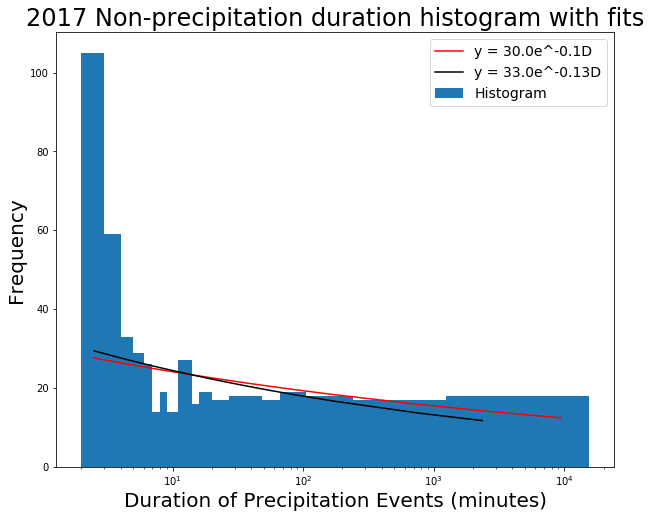

In [13]:
plt.figure(figsize = (10,8))
plt.bar(bin17_val_np100, np_hist17_100, np.diff(np_bin17_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Non-precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin17_val_np100, hist17_np100_predict, color = 'r')
plt.plot(bin17_val_np98, hist17_np98_predict, color = 'k')
label_17_np100 = 'y = ' + str(round(curve17_np100[1])) + 'e^' + str(round(curve17_np100[0],2)) + 'D'
label_17_np98 = 'y = ' + str(round(curve17_np98[1])) + 'e^' + str(round(curve17_np98[0],2)) + 'D'
plt.legend(labels = [label_17_np100, label_17_np98, 'Histogram'], fontsize = 14)

In [10]:
# Did not touch this is to calculate fits for seasonal stuff
nonprecip_17, bin_val_17 = calc(nonprecip17, non_perc_17)
print(nonprecip_17)
Su_nonprecip_17, Su_bin_val_17 = calc(Su_nonprecip17, non_perc_17)
print(Su_nonprecip_17)
Fnonprecip_17, Fbin_val_17 = calc(Fnonprecip17, non_perc_17)
print(Fnonprecip_17)

[1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00
 7.0000e+00 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01
 1.6000e+01 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01
 1.0480e+02 2.4120e+02 1.2352e+03 3.4692e+03 1.5394e+04]
[2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00 6.0000e+00 7.0000e+00
 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01 1.4000e+01 1.6000e+01
 2.0000e+01 2.7000e+01 3.5000e+01 4.8000e+01 6.6000e+01 1.0480e+02
 2.4120e+02 1.2352e+03 3.4692e+03 1.5394e+04]
[-0.09672319 30.17926005]
[-0.10256491 10.87013101]
[-0.0860172  17.87257168]


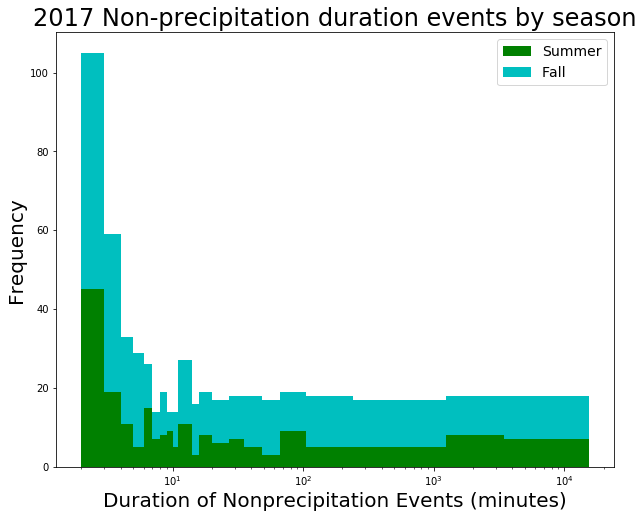

In [14]:
plt.figure(figsize = (10,8))
plt.hist([ Su_nonprecip17,Fnonprecip17], bins =one_bin17_np100, range= (nonprecip17.min,nonprecip17.max), color = ['g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.legend(labels = ['Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [15]:
precip17 = precip17[precip17 > 0]
preciptotal17 = preciptotal17[preciptotal17 > 0]
int17_100 = np.zeros(51)
inten17 = np.divide(preciptotal17, precip17)
for i in range(0, 51):
    int17_100[i] =np.round(np.percentile(inten17, i*2), 2)
print(int17_100)
int17_98 = int17_100[:50]
print(int17_98)




[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.04 0.04 0.05 0.06 0.12 0.4 ]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.04 0.04 0.05 0.06 0.12]


In [18]:
intensa17_100 = np.unique(int17_100)
intensa17_98 = np.unique(int17_98)
one = [intensa17_100[0]]
intens17_100 = np.setdiff1d(intensa17_100, one)
intens17_98 = np.setdiff1d(intensa17_98, one)
inten_hist17_100, inten_bin17_edge100 = np.histogram(inten17, bins = intens17_100 )
inten_hist17_98, inten_bin17_edge98 = np.histogram(inten17, bins = intens17_98)
print(inten_hist17_100)
print(inten_hist17_98)

[61 26 27  9 24 17]
[61 26 27  9 24]


In [19]:
curve17_inten100, bin17_val_inten100 = histplot.calc(inten17, intens17_100)
print(curve17_inten100)
print(bin17_val_inten100)
curve17_inten98, bin17_val_inten98 = histplot.calc(inten17, intens17_98)
print(curve17_inten98)
print(bin17_val_inten98)

[-0.37891276  8.04243361]
[0.025 0.035 0.045 0.055 0.09  0.26 ]
[-0.82568781  1.9280679 ]
[0.025 0.035 0.045 0.055 0.09 ]


In [21]:
hist17_inten100_predict =curve17_inten100[1]*np.exp(curve17_inten100[0]*np.log(bin17_val_inten100))
print(hist17_inten100_predict)
hist17_inten98_predict =curve17_inten98[1]*np.exp(curve17_inten98[0]*np.log(bin17_val_inten98))
print(hist17_inten98_predict)

[32.54081754 28.64565006 26.04368596 24.13682469 20.02803506 13.39866561]
[40.54373289 30.70913574 24.95446917 21.14411432 14.07963959]


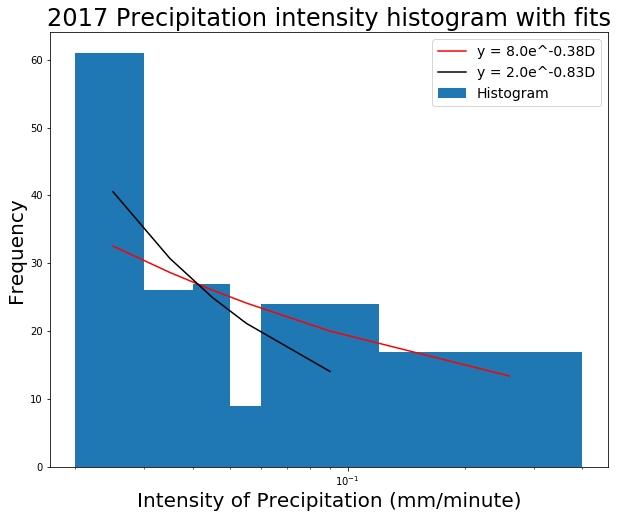

In [23]:
plt.figure(figsize = (10,8))
plt.bar(bin17_val_inten100, inten_hist17_100, np.diff(inten_bin17_edge100))
plt.xlabel('Intensity of Precipitation (mm/minute)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Precipitation intensity histogram with fits', fontsize = 24)
plt.plot(bin17_val_inten100, hist17_inten100_predict, color = 'r')
plt.plot(bin17_val_inten98, hist17_inten98_predict, color = 'k')
label_17_inten100 = 'y = ' + str(round(curve17_inten100[1])) + 'e^' + str(round(curve17_inten100[0],2)) + 'D'
label_17_inten98 = 'y = ' + str(round(curve17_inten98[1])) + 'e^' + str(round(curve17_inten98[0],2)) + 'D'
plt.legend(labels = [label_17_inten100, label_17_inten98, 'Histogram'], fontsize = 14)

In [24]:
# Intensity calculation seasonal. 
Su_preciptotal17 = Su_preciptotal17[Su_preciptotal17>0]
Su_precip17 = Su_precip17[Su_precip17>0]
Fpreciptotal17 = Fpreciptotal17[Fpreciptotal17>0]
Fprecip17 = Fprecip17[Fprecip17>0]
#print(inten17)
Su_inten17 = np.divide(Su_preciptotal17,Su_precip17)
Finten17 = np.divide(Fpreciptotal17, Fprecip17)

In [16]:
# Don't do yet, when re-calculating stuff, then we can do them!
Su_int_17coef, Su_int_bin_val_17 = calc(Su_inten17, intensa17)
print(Su_int_17coef)
Fint_17coef, Fint_bin_val_17 = calc(Finten17, intensa17)
print(Fint_17coef)

[-0.94639459  0.81344043]
[-1.12828836  0.80682892]


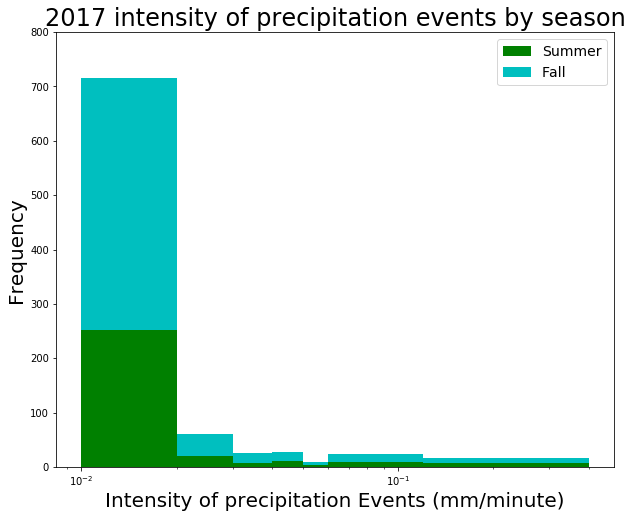

In [25]:
plt.figure(figsize = (10,8))
plt.hist([ Su_inten17,Finten17], bins = int17_100, range= (int17_100.min(),int17_100.max()), color = ['g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,800)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.legend( ['Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [26]:
# 2018 
Wprecip18, Wnonprecip18, Wpreciptotal18, Wtotalprep18 = histplot.preciphist(Winter18, len(Winter18), 5000, 1, 1)
Sp_precip18, Sp_nonprecip18, Sp_preciptotal18, Sp_totalprep18 = histplot.preciphist(Spring18, len(Spring18), 5000, 1, 1)
Su_precip18, Su_nonprecip18, Su_preciptotal18, Su_totalprep18 = histplot.preciphist(Summer18, len(Summer18), 5000, 1, 1)
Fprecip18, Fnonprecip18, Fpreciptotal18, Ftotalprep18 = histplot.preciphist(Fall18, len(Fall18), 5000, 1, 1)

precip18, nonprecip18, preciptotal18, totalprep18 = histplot.preciphist(Season18, len(Season18), 20000, 1, 1)
nonprecip18 = nonprecip18[nonprecip18 > 0]
nonprep18_100 = np.zeros(51)
for i in range(0, 51):
    nonprep18_100[i] =np.percentile(nonprecip18, i*2)
print(nonprep18_100)
nonprep18_98 = nonprep18_100[:50]
print(nonprep18_98)

[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 5.000e+00
 6.000e+00 6.000e+00 7.000e+00 9.000e+00 1.000e+01 1.200e+01 1.400e+01
 1.800e+01 2.400e+01 3.200e+01 4.700e+01 8.100e+01 1.650e+02 4.240e+02
 2.321e+03 1.412e+04]
[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 5.000e+00
 6.000e+00 6.000e+00 7.000e+00 9.000e+00 1.000e+01 1.200e+01 1.400e+01
 1.800e+01 2.400e+01 3.200e+01 4.700e+01 8.100e+01 1.65

In [27]:
one_bin18_np100 = np.unique(nonprep18_100)
one_bin18_np98 = np.unique(nonprep18_98)
stop1 = np.array([1])
one_bin18_np100 = np.setdiff1d(one_bin18_np100, stop1)
one_bin18_np98 = np.setdiff1d(one_bin18_np98, stop1)
print(one_bin18_np100)
print(one_bin18_np98)
np_hist18_100, np_bin18_edge100 = np.histogram(nonprecip18, bins = one_bin18_np100)
np_hist18_98, np_bin18_edge98 = np.histogram(nonprecip18, bins = one_bin18_np98)
print(np_hist18_100)
print(np_hist18_98)

curve18_np100, bin18_val_np100 = histplot.calc(nonprecip18, one_bin18_np100)
print(curve18_np100)
print(bin18_val_np100)
curve18_np98, bin18_val_np98 = histplot.calc(nonprecip18, one_bin18_np98)
print(curve18_np98)
print(bin18_val_np98)
# Seasonal breakdown
#Wnonprecip_18, Wbin_val_18 = calc(Wnonprecip18, non_perc_18)
#print(Wnonprecip_18)

#Sp_nonprecip_18, Sp_bin_val_18 = calc(Sp_nonprecip18, non_perc_18)
#print(Sp_nonprecip_18)

#Su_nonprecip_18, Su_bin_val_18 = calc(Su_nonprecip18, non_perc_18)
#print(Su_nonprecip_18)

#Fnonprecip_18, Fbin_val_18 = calc(Fnonprecip18, non_perc_18)
#print(Fnonprecip_18)

[2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00 9.000e+00
 1.000e+01 1.200e+01 1.400e+01 1.800e+01 2.400e+01 3.200e+01 4.700e+01
 8.100e+01 1.650e+02 4.240e+02 2.321e+03 1.412e+04]
[2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00 9.000e+00
 1.000e+01 1.200e+01 1.400e+01 1.800e+01 2.400e+01 3.200e+01 4.700e+01
 8.100e+01 1.650e+02 4.240e+02 2.321e+03]
[542 263 187 127  98 137  53  79  67  93  76  70  77  76  75  74  74  75]
[542 263 187 127  98 137  53  79  67  93  76  70  77  76  75  74  75]
[-1.38488665e-01  1.60127354e+02]
[2.5000e+00 3.5000e+00 4.5000e+00 5.5000e+00 6.5000e+00 8.0000e+00
 9.5000e+00 1.1000e+01 1.3000e+01 1.6000e+01 2.1000e+01 2.8000e+01
 3.9500e+01 6.4000e+01 1.2300e+02 2.9450e+02 1.3725e+03 8.2205e+03]
[ -0.20277413 188.99889931]
[   2.5    3.5    4.5    5.5    6.5    8.     9.5   11.    13.    16.
   21.    28.    39.5   64.   123.   294.5 1372.5]


In [28]:
hist18_np100_predict =curve18_np100[1]*np.exp(curve18_np100[0]*np.log(bin18_val_np100))
print(hist18_np100_predict)
hist18_np98_predict =curve18_np98[1]*np.exp(curve18_np98[0]*np.log(bin18_val_np98))
print(hist18_np98_predict)

[141.04423761 134.62269213 130.01785573 126.45432504 123.56237373
 120.05985146 117.23624278 114.88000498 112.25275296 109.07081533
 105.03962039 100.93703534  96.23984798  90.01814835  82.23133859
  72.86604574  58.87835014  45.95116213]
[156.95217346 146.60080269 139.31717931 133.76203628 129.30683231
 123.97553313 119.72978902 116.2229179  112.35188828 107.71963862
 101.94065084  96.16411914  89.68311429  81.32286945  71.23289172
  59.67502927  43.67701234]


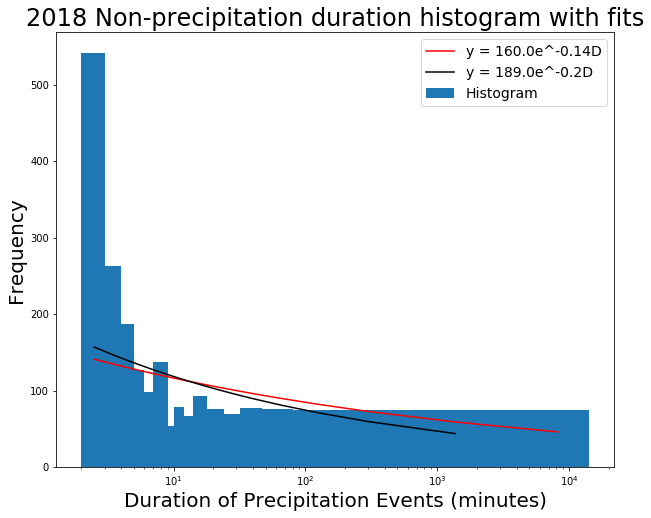

In [29]:
plt.figure(figsize = (10,8))
plt.bar(bin18_val_np100, np_hist18_100, np.diff(np_bin18_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Non-precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin18_val_np100, hist18_np100_predict, color = 'r')
plt.plot(bin18_val_np98, hist18_np98_predict, color = 'k')
label_18_np100 = 'y = ' + str(round(curve18_np100[1])) + 'e^' + str(round(curve18_np100[0],2)) + 'D'
label_18_np98 = 'y = ' + str(round(curve18_np98[1])) + 'e^' + str(round(curve18_np98[0],2)) + 'D'
plt.legend(labels = [label_18_np100, label_18_np98, 'Histogram'], fontsize = 14)

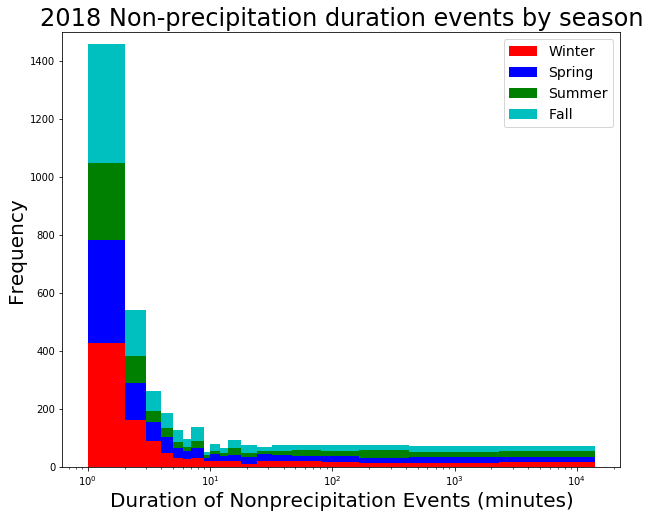

In [31]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip18, Sp_nonprecip18, Su_nonprecip18,Fnonprecip18], bins =nonprep18_100, range= (nonprep18_100.min,nonprep18_100.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
#plt.plot(bin_val_18, nonprecip_18[1]*np.exp(np.log(bin_val_18)*nonprecip_18[0]), color = 'k' )
plt.legend(labels = ['Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [32]:
precip18 = precip18[precip18 > 0]
preciptotal18 = preciptotal18[preciptotal18 > 0]
int18_100 = np.zeros(51)
inten18 = np.divide(preciptotal18, precip18)
for i in range(0, 51):
    int18_100[i] =np.round(np.percentile(inten18, i*2), 2)
print(int18_100)
int18_98 = int18_100[:50]
print(int18_98)

# Intensity calculation seasonal. 
Wpreciptotal18 = Wpreciptotal18[Wpreciptotal18>0]
Wprecip18 = Wprecip18[Wprecip18>0]
Sp_preciptotal18 = Sp_preciptotal18[Sp_preciptotal18>0]
Sp_precip18 = Sp_precip18[Sp_precip18>0]
Su_preciptotal18 = Su_preciptotal18[Su_preciptotal18>0]
Su_precip18 = Su_precip18[Su_precip18>0]
Fpreciptotal18 = Fpreciptotal18[Fpreciptotal18>0]
Fprecip18 = Fprecip18[Fprecip18>0]


Winten18 = np.divide(Wpreciptotal18, Wprecip18)
Sp_inten18 = np.divide(Sp_preciptotal18,Sp_precip18)
Su_inten18 = np.divide(Su_preciptotal18,Su_precip18)
Finten18 = np.divide(Fpreciptotal18, Fprecip18)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02
 0.02 0.02 0.02 0.03 0.03 0.05 0.06 0.11 0.73]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02
 0.02 0.02 0.02 0.03 0.03 0.05 0.06 0.11]


In [33]:
intensa18_100 = np.unique(int18_100)
intensa18_98 = np.unique(int18_98)
one = [intensa18_100[0]]
intens18_100 = np.setdiff1d(intensa18_100, one)
intens18_98 = np.setdiff1d(intensa18_98, one)
inten_hist18_100, inten_bin18_edge100 = np.histogram(inten18, bins = intens18_100 )
inten_hist18_98, inten_bin18_edge98 = np.histogram(inten18, bins = intens18_98)
print(inten_hist18_100)
print(inten_hist18_98)

[286 163  44  87  72]
[286 163  44  87]


In [34]:
curve18_inten100, bin18_val_inten100 = histplot.calc(inten18, intens18_100)
print(curve18_inten100)
print(bin18_val_inten100)
curve18_inten98, bin18_val_inten98 = histplot.calc(inten18, intens18_98)
print(curve18_inten98)
print(bin18_val_inten98)

#Wint_18coef, Wint_bin_val_18, Whist18 = calc(Winten18, intensa18)
#print(Wint_18coef)

#Sp_int_18coef, Sp_int_bin_val_18, Sp_hist18 = calc(Sp_inten18, intensa18)
#print(Sp_int_18coef)

#Su_int_18coef, Su_int_bin_val_18, Su_hist18 = calc(Su_inten18, intensa18)
#print(Su_int_18coef)

#Fint_18coef, Fint_bin_val_18, Fhist18 = calc(Finten18, intensa18)
#print(Fint_18coef)

[-0.38094567 38.63336853]
[0.025 0.04  0.055 0.085 0.42 ]
[-1.18464318  3.04985844]
[0.025 0.04  0.055 0.085]


In [35]:
hist18_inten100_predict =curve18_inten100[1]*np.exp(curve18_inten100[0]*np.log(bin18_val_inten100))
print(hist18_inten100_predict)
hist18_inten98_predict =curve18_inten98[1]*np.exp(curve18_inten98[0]*np.log(bin18_val_inten98))
print(hist18_inten98_predict)

[157.49268873 131.67452894 116.63152629  98.80884074  53.76307858]
[241.07330347 138.14646439  94.73281152  56.56349632]


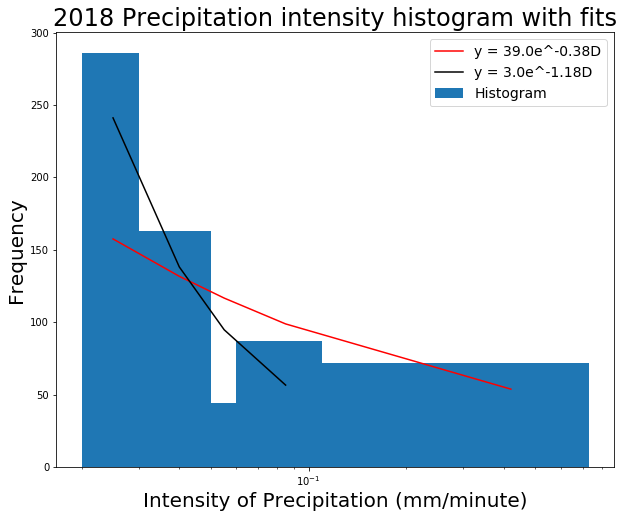

In [36]:
plt.figure(figsize = (10,8))
plt.bar(bin18_val_inten100, inten_hist18_100, np.diff(inten_bin18_edge100))
plt.xlabel('Intensity of Precipitation (mm/minute)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Precipitation intensity histogram with fits', fontsize = 24)
plt.plot(bin18_val_inten100, hist18_inten100_predict, color = 'r')
plt.plot(bin18_val_inten98, hist18_inten98_predict, color = 'k')
label_18_inten100 = 'y = ' + str(round(curve18_inten100[1])) + 'e^' + str(round(curve18_inten100[0],2)) + 'D'
label_18_inten98 = 'y = ' + str(round(curve18_inten98[1])) + 'e^' + str(round(curve18_inten98[0],2)) + 'D'
plt.legend(labels = [label_18_inten100, label_18_inten98, 'Histogram'], fontsize = 14)

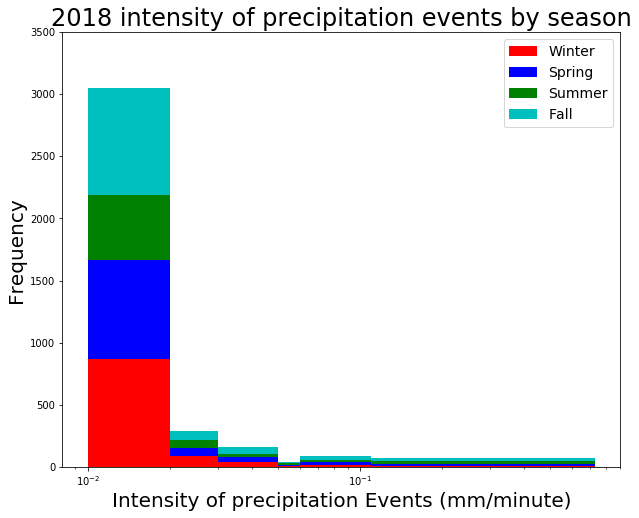

In [37]:
plt.figure(figsize = (10,8))
plt.hist([ Winten18, Sp_inten18, Su_inten18,Finten18], bins = int18_100, range= (int18_100.min(), int18_100.max()), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
#plt.plot(int_bin_val_18, int_18coef[1]*np.exp(np.log(int_bin_val_18)*int_18coef[0]), color = 'k' )
plt.legend(labels = ['Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [38]:
Wprecip19, Wnonprecip19, Wpreciptotal19, Wtotalprep19 = histplot.preciphist(Winter19, len(Winter19), 5000, 1, 1)
Sp_precip19, Sp_nonprecip19, Sp_preciptotal19, Sp_totalprep19 = histplot.preciphist(Spring19, len(Spring19), 5000, 1, 1)
Su_precip19, Su_nonprecip19, Su_preciptotal19, Su_totalprep19 = histplot.preciphist(Summer19, len(Summer19), 5000, 1, 1)
Fprecip19, Fnonprecip19, Fpreciptotal19, Ftotalprep19 = histplot.preciphist(Fall19, len(Fall19), 5000, 1, 1)
precip19, nonprecip19, preciptotal19, totalprep19 = histplot.preciphist(Season19, len(Season19), 20000, 1, 1)


In [39]:
nonprecip19 = nonprecip19[nonprecip19 > 0]
nonprep19_100 = np.zeros(51)
for i in range(0, 51):
    nonprep19_100[i] =np.percentile(nonprecip19, i*2)
print(nonprep19_100)
nonprep19_98 = nonprep19_100[:50]
print(nonprep19_98)

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 4.00000e+00 4.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01
 2.10000e+01 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02
 5.93120e+02 2.76686e+03 1.59490e+04]
[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 

In [40]:
one_bin19_np100 = np.unique(nonprep19_100)
one_bin19_np98 = np.unique(nonprep19_98)
stop1 = np.array([1])
one_bin19_np100 = np.setdiff1d(one_bin19_np100, stop1)
one_bin19_np98 = np.setdiff1d(one_bin19_np98, stop1)
print(one_bin19_np100)
print(one_bin19_np98)
np_hist19_100, np_bin19_edge100 = np.histogram(nonprecip19, bins = one_bin19_np100)
np_hist19_98, np_bin19_edge98 = np.histogram(nonprecip19, bins = one_bin19_np98)
print(np_hist19_100)
print(np_hist19_98)

curve19_np100, bin19_val_np100 = histplot.calc(nonprecip19, one_bin19_np100)
print(curve19_np100)
print(bin19_val_np100)
curve19_np98, bin19_val_np98 = histplot.calc(nonprecip19, one_bin19_np98)
print(curve19_np98)
print(bin19_val_np98)
# Seasonal breakdown
#Wnonprecip_19, Wbin_val_19 = calc(Wnonprecip19, non_perc_19)
#print(Wnonprecip_19)

#Sp_nonprecip_19, Sp_bin_val_19 = calc(Sp_nonprecip19, non_perc_19)
#print(Sp_nonprecip_19)

#Su_nonprecip_19, Su_bin_val_19 = calc(Su_nonprecip19, non_perc_19)
#print(Su_nonprecip_19)

#Fnonprecip_19, Fbin_val_19 = calc(Fnonprecip19, non_perc_19)
#print(Fnonprecip_19)

[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01 2.10000e+01
 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02 5.93120e+02
 2.76686e+03 1.59490e+04]
[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01 2.10000e+01
 2.70000e+01 3.80000e+01 5.30000e+01 8.94800e+01 2.06180e+02 5.93120e+02
 2.76686e+03]
[449 236 147 104  61  60  46  74  86  53  77  57  68  67  65  64  64  64
  64]
[449 236 147 104  61  60  46  74  86  53  77  57  68  67  65  64  64  64]
[-1.13745614e-01  1.19567808e+02]
[2.50000e+00 3.50000e+00 4.50000e+00 5.50000e+00 6.50000e+00 7.50000e+00
 8.50000e+00 1.00000e+01 1.25000e+01 1.55000e+01 1.90000e+01 2.40000e+01
 3.25000e+01 4.55000e+01 7.12400e+01 1.47830e+02 3.99650e+02 1.67999e+03
 9.35793e+03]
[ -0.16418785 136.34126855]
[   2.5     3.5     4.5     5.5     6.5     7.5     8.5    10.     12.5
  

In [41]:
hist19_np100_predict =curve19_np100[1]*np.exp(curve19_np100[0]*np.log(bin19_val_np100))
print(hist19_np100_predict)
hist19_np98_predict =curve19_np98[1]*np.exp(curve19_np98[0]*np.log(bin19_val_np98))
print(hist19_np98_predict)

[107.73339295 103.68809954 100.76604423  98.49206874  96.63822385
  95.07796713  93.73395495  92.01712376  89.71097261  87.54256316
  85.53850479  83.29545269  80.47188356  77.45023566  73.59953136
  67.73502433  60.49014134  51.37475653  42.25810163]
[117.29794874 110.99360825 106.50690743 103.05493053 100.26672667
  97.93837775  95.94625736  93.41991849  90.05919023  86.93393386
  84.07590109  80.91208994  76.9829337   72.84537945  67.67567272
  60.03142957  50.98743024  40.27830348]


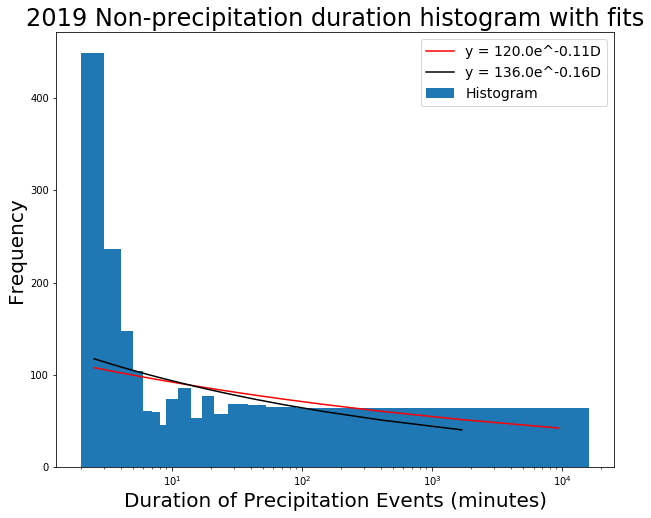

In [42]:
plt.figure(figsize = (10,8))
plt.bar(bin19_val_np100, np_hist19_100, np.diff(np_bin19_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Non-precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin19_val_np100, hist19_np100_predict, color = 'r')
plt.plot(bin19_val_np98, hist19_np98_predict, color = 'k')
label_19_np100 = 'y = ' + str(round(curve19_np100[1])) + 'e^' + str(round(curve19_np100[0],2)) + 'D'
label_19_np98 = 'y = ' + str(round(curve19_np98[1])) + 'e^' + str(round(curve19_np98[0],2)) + 'D'
plt.legend(labels = [label_19_np100, label_19_np98, 'Histogram'], fontsize = 14)

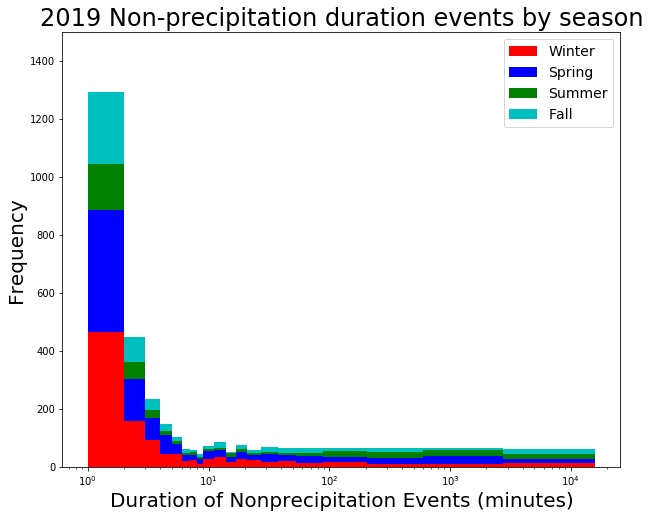

In [43]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip19, Sp_nonprecip19, Su_nonprecip19,Fnonprecip19], bins =nonprep19_100, range= (nonprep19_100.min,nonprep19_100.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Non-precipitation duration events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
#plt.plot(bin_val_19, nonprecip_19[1]*np.exp(np.log(bin_val_19)*nonprecip_19[0]), color = 'k' )
plt.legend(labels = ['Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [44]:
precip19 = precip19[precip19 > 0]
preciptotal19 = preciptotal19[preciptotal19 > 0]
int19_100 = np.zeros(51)
inten19 = np.divide(preciptotal19, precip19)
for i in range(0, 51):
    int19_100[i] =np.round(np.percentile(inten19, i*2), 2)
print(int19_100)
int19_98 = int19_100[:50]
print(int19_98)

# Intensity calculation seasonal. 
Wpreciptotal19 = Wpreciptotal19[Wpreciptotal19>0]
Wprecip19 = Wprecip19[Wprecip19>0]
Sp_preciptotal19 = Sp_preciptotal19[Sp_preciptotal19>0]
Sp_precip19 = Sp_precip19[Sp_precip19>0]
Su_preciptotal19 = Su_preciptotal19[Su_preciptotal19>0]
Su_precip19 = Su_precip19[Su_precip19>0]
Fpreciptotal19 = Fpreciptotal19[Fpreciptotal19>0]
Fprecip19 = Fprecip19[Fprecip19>0]


Winten19 = np.divide(Wpreciptotal19, Wprecip19)
Sp_inten19 = np.divide(Sp_preciptotal19,Sp_precip19)
Su_inten19 = np.divide(Su_preciptotal19,Su_precip19)
Finten19 = np.divide(Fpreciptotal19, Fprecip19)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.03 0.04 0.05 0.07 0.12 0.6 ]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.03 0.04 0.05 0.07 0.12]


In [45]:
intensa19_100 = np.unique(int19_100)
intensa19_98 = np.unique(int19_98)
one = [intensa19_100[0]]
intens19_100 = np.setdiff1d(intensa19_100, one)
intens19_98 = np.setdiff1d(intensa19_98, one)
inten_hist19_100, inten_bin19_edge100 = np.histogram(inten19, bins = intens19_100 )
inten_hist19_98, inten_bin19_edge98 = np.histogram(inten19, bins = intens19_98)
print(inten_hist19_100)
print(inten_hist19_98)

[253 108  70  54  61  63]
[253 108  70  54  61]


In [34]:
#intensity19 = np.append([0.01], intens19)
#print(intensity19)
#two = [intensity19[1],intensity19[2],intensity19[3], intensity19[4], intensity19[5], intensity19[6]]
#changestuff1 = np.setdiff1d(intensity19, two)
#print(changestuff1)
#intensity19 = changestuff1
#intens19 = np.setdiff1d(intensity19, [0.01])
#print(intens19)

[0.01       0.012      0.01333333 0.015      0.015      0.01666667
 0.018      0.02       0.02274848 0.02655439 0.03093636 0.03771048
 0.04722662 0.06676667 0.11932857]
[0.01       0.02       0.02274848 0.02655439 0.03093636 0.03771048
 0.04722662 0.06676667 0.11932857]
[0.02       0.02274848 0.02655439 0.03093636 0.03771048 0.04722662
 0.06676667 0.11932857]


In [46]:
curve19_inten100, bin19_val_inten100 = histplot.calc(inten19, intens19_100)
print(curve19_inten100)
print(bin19_val_inten100)
curve19_inten98, bin19_val_inten98 = histplot.calc(inten19, intens19_98)
print(curve19_inten98)
print(bin19_val_inten98)

#Wint_19coef, Wint_bin_val_19, Whist19 = calc(Winten19, intensa19)
#print(Wint_19coef)

#Sp_int_19coef, Sp_int_bin_val_19, Sp_hist19 = calc(Sp_inten19, intensa19)
#print(Sp_int_19coef)

#Su_int_19coef, Su_int_bin_val_19, Su_hist19 = calc(Su_inten19, intensa19)
#print(Su_int_19coef)

#Fint_19coef, Fint_bin_val_19, Fhist19 = calc(Finten19, intensa19)
#print(Fint_19coef)

[-0.38171542 30.33135542]
[0.025 0.035 0.045 0.06  0.095 0.36 ]
[-1.04930691  3.66880709]
[0.025 0.035 0.045 0.06  0.095]


In [47]:
hist19_inten100_predict =curve19_inten100[1]*np.exp(curve19_inten100[0]*np.log(bin19_val_inten100))
print(hist19_inten100_predict)
hist19_inten98_predict =curve19_inten98[1]*np.exp(curve19_inten98[0]*np.log(bin19_val_inten98))
print(hist19_inten98_predict)

[124.00032236 109.05447472  99.07894275  88.77492659  74.49214456
  44.79793483]
[176.02627487 123.66429917  94.99883829  70.24561429  43.37171181]


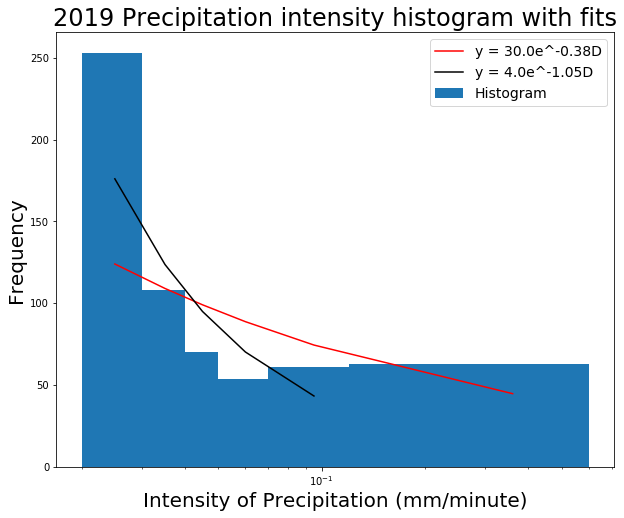

In [48]:
plt.figure(figsize = (10,8))
plt.bar(bin19_val_inten100, inten_hist19_100, np.diff(inten_bin19_edge100))
plt.xlabel('Intensity of Precipitation (mm/minute)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Precipitation intensity histogram with fits', fontsize = 24)
plt.plot(bin19_val_inten100, hist19_inten100_predict, color = 'r')
plt.plot(bin19_val_inten98, hist19_inten98_predict, color = 'k')
label_19_inten100 = 'y = ' + str(round(curve19_inten100[1])) + 'e^' + str(round(curve19_inten100[0],2)) + 'D'
label_19_inten98 = 'y = ' + str(round(curve19_inten98[1])) + 'e^' + str(round(curve19_inten98[0],2)) + 'D'
plt.legend(labels = [label_19_inten100, label_19_inten98, 'Histogram'], fontsize = 14)

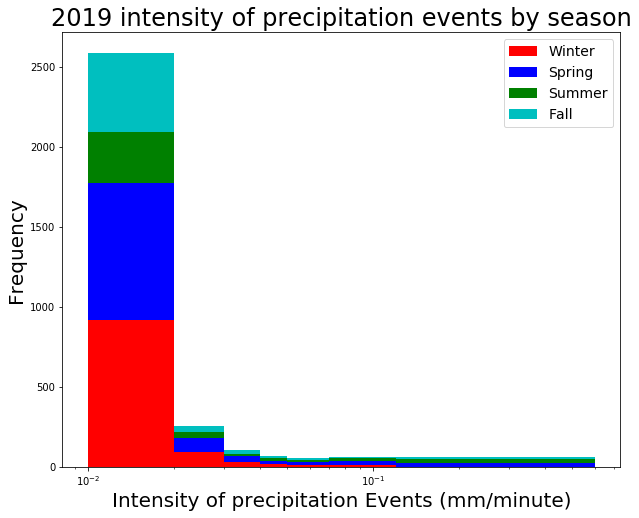

In [49]:
plt.figure(figsize = (10,8))
plt.hist([ Winten19, Sp_inten19, Su_inten19,Finten19], bins = int19_100, range= (int19_100.min(),int19_100.max()), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
#plt.plot(int_bin_val_19, int_19coef[1]*np.exp(np.log(int_bin_val_19)*int_19coef[0]), color = 'k' )
plt.legend(labels = ['Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [50]:
Wprecip20, Wnonprecip20, Wpreciptotal20, Wtotalprep20 = histplot.preciphist(Winter20, len(Winter20), 5000, 1, 1)
Sp_precip20, Sp_nonprecip20, Sp_preciptotal20, Sp_totalprep20 = histplot.preciphist(Spring20, len(Spring20), 5000, 1, 1)
Su_precip20, Su_nonprecip20, Su_preciptotal20, Su_totalprep20 = histplot.preciphist(Summer20, len(Summer20), 5000, 1, 1)
Fprecip20, Fnonprecip20, Fpreciptotal20, Ftotalprep20 = histplot.preciphist(Fall20, len(Fall20), 5000, 1, 1)

precip20, nonprecip20, preciptotal20, totalprep20 = histplot.preciphist(Season20, len(Season20), 20000, 1, 1)

In [51]:
nonprecip20 = nonprecip20[nonprecip20 > 0]
nonprep20_100 = np.zeros(51)
for i in range(0, 51):
    nonprep20_100[i] =np.percentile(nonprecip20, i*2)
print(nonprep20_100)
nonprep20_98 = nonprep20_100[:50]
print(nonprep20_98)

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 4.00000e+00 4.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01
 2.10000e+01 2.80000e+01 3.90000e+01 5.90000e+01 1.00000e+02 2.01000e+02
 6.70840e+02 2.36852e+03 1.93260e+04]
[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00
 3.00000e+00 

In [52]:
one_bin20_np100 = np.unique(nonprep20_100)
one_bin20_np98 = np.unique(nonprep20_98)
stop1 = np.array([1])
one_bin20_np100 = np.setdiff1d(one_bin20_np100, stop1)
one_bin20_np98 = np.setdiff1d(one_bin20_np98, stop1)
print(one_bin20_np100)
print(one_bin20_np98)
np_hist20_100, np_bin20_edge100 = np.histogram(nonprecip20, bins = one_bin20_np100)
np_hist20_98, np_bin20_edge98 = np.histogram(nonprecip20, bins = one_bin20_np98)
print(np_hist20_100)
print(np_hist20_98)

curve20_np100, bin20_val_np100 = histplot.calc(nonprecip20, one_bin20_np100)
print(curve20_np100)
print(bin20_val_np100)
curve20_np98, bin20_val_np98 = histplot.calc(nonprecip20, one_bin20_np98)
print(curve20_np98)
print(bin20_val_np98)
# Seasonal breakdown
#Wnonprecip_20, Wbin_val_20 = calc(Wnonprecip20, non_perc_20)
#print(Wnonprecip_20)

#Sp_nonprecip_20, Sp_bin_val_20 = calc(Sp_nonprecip20, non_perc_20)
#print(Sp_nonprecip_20)

#Su_nonprecip_20, Su_bin_val_20 = calc(Su_nonprecip20, non_perc_20)
#print(Su_nonprecip_20)

#Fnonprecip_20, Fbin_val_20 = calc(Fnonprecip20, non_perc_20)
#print(Fnonprecip_20)

[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01 2.10000e+01
 2.80000e+01 3.90000e+01 5.90000e+01 1.00000e+02 2.01000e+02 6.70840e+02
 2.36852e+03 1.93260e+04]
[2.00000e+00 3.00000e+00 4.00000e+00 5.00000e+00 6.00000e+00 7.00000e+00
 8.00000e+00 9.00000e+00 1.10000e+01 1.40000e+01 1.70000e+01 2.10000e+01
 2.80000e+01 3.90000e+01 5.90000e+01 1.00000e+02 2.01000e+02 6.70840e+02
 2.36852e+03]
[483 217 164 101  70  64  56  77 101  65  67  75  69  71  69  68  70  69
  69]
[483 217 164 101  70  64  56  77 101  65  67  75  69  71  69  68  70  69]
[-1.10829267e-01  1.28012303e+02]
[2.500000e+00 3.500000e+00 4.500000e+00 5.500000e+00 6.500000e+00
 7.500000e+00 8.500000e+00 1.000000e+01 1.250000e+01 1.550000e+01
 1.900000e+01 2.450000e+01 3.350000e+01 4.900000e+01 7.950000e+01
 1.505000e+02 4.359200e+02 1.519680e+03 1.084726e+04]
[ -0.16182721 146.34490495]
[   2.5     3.5     4.5     5.5     6.5     7.5     8.5

In [53]:
hist20_np100_predict =curve20_np100[1]*np.exp(curve20_np100[0]*np.log(bin20_val_np100))
print(hist20_np100_predict)
hist20_np98_predict =curve20_np98[1]*np.exp(curve20_np98[0]*np.log(bin20_val_np98))
print(hist20_np98_predict)

[115.65071177 111.41740698 108.35691836 105.97364083 104.02964536
 102.39277448 100.98221467  99.17962055  96.75690694  94.47744061
  92.36945583  89.80312517  86.74253524  83.1626877   78.8198154
  73.43733955  65.27219067  56.83560022  45.71093932]
[126.17696757 119.49028403 114.7281653  111.06232959 108.10010275
 105.62552593 103.50762306 100.82085992  97.24509844  93.91815442
  90.87417473  87.21129508  82.90559896  77.95749788  72.08526465
  65.01191386  54.73306517  44.7181198 ]


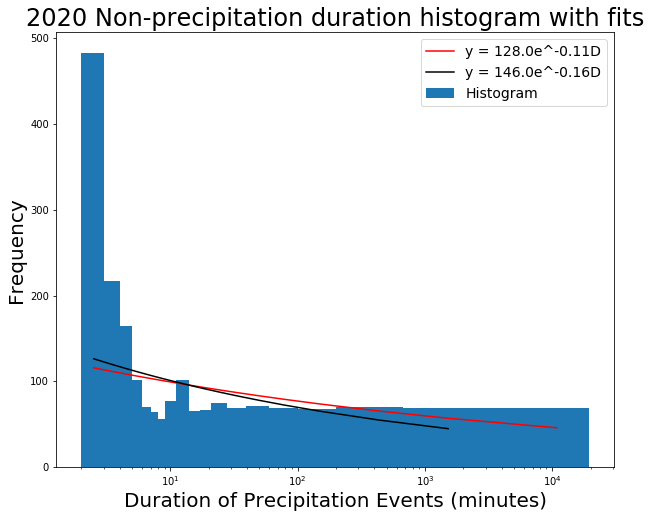

In [54]:
plt.figure(figsize = (10,8))
plt.bar(bin20_val_np100, np_hist20_100, np.diff(np_bin20_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Non-precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin20_val_np100, hist20_np100_predict, color = 'r')
plt.plot(bin20_val_np98, hist20_np98_predict, color = 'k')
label_20_np100 = 'y = ' + str(round(curve20_np100[1])) + 'e^' + str(round(curve20_np100[0],2)) + 'D'
label_20_np98 = 'y = ' + str(round(curve20_np98[1])) + 'e^' + str(round(curve20_np98[0],2)) + 'D'
plt.legend(labels = [label_20_np100, label_20_np98, 'Histogram'], fontsize = 14)

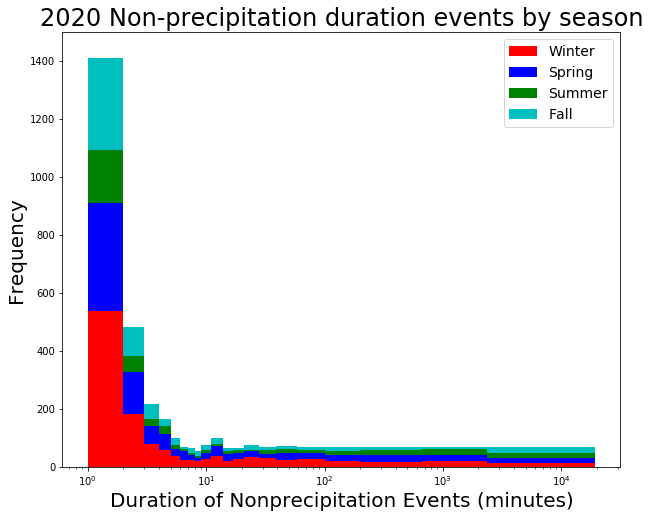

In [55]:
plt.figure(figsize = (10,8))
plt.hist([ Wnonprecip20, Sp_nonprecip20, Su_nonprecip20, Fnonprecip20], bins =nonprep20_100, range= (nonprep20_100.min,nonprep20_100.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Nonprecipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Non-precipitation duration events by season', fontsize = 24)
plt.legend(labels = ['Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [56]:
precip20 = precip20[precip20 > 0]
preciptotal20 = preciptotal20[preciptotal20 > 0]
int20_100 = np.zeros(51)
inten20 = np.divide(preciptotal20, precip20)
for i in range(0, 51):
    int20_100[i] =np.round(np.percentile(inten20, i*2), 2)
print(int20_100)
int20_98 = int20_100[:50]
print(int20_98)

# Intensity calculation seasonal. 
Wpreciptotal20 = Wpreciptotal20[Wpreciptotal20>0]
Wprecip20 = Wprecip20[Wprecip20>0]
Sp_preciptotal20 = Sp_preciptotal20[Sp_preciptotal20>0]
Sp_precip20 = Sp_precip20[Sp_precip20>0]
Su_preciptotal20 = Su_preciptotal20[Su_preciptotal20>0]
Su_precip20 = Su_precip20[Su_precip20>0]
Fpreciptotal20 = Fpreciptotal20[Fpreciptotal20>0]
Fprecip20 = Fprecip20[Fprecip20>0]


Winten20 = np.divide(Wpreciptotal20, Wprecip20)
Sp_inten20 = np.divide(Sp_preciptotal20,Sp_precip20)
Su_inten20 = np.divide(Su_preciptotal20,Su_precip20)
Finten20 = np.divide(Fpreciptotal20, Fprecip20)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02
 0.02 0.02 0.02 0.03 0.03 0.04 0.05 0.09 0.94]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02
 0.02 0.02 0.02 0.03 0.03 0.04 0.05 0.09]


In [57]:
intensa20_100 = np.unique(int20_100)
intensa20_98 = np.unique(int20_98)
one = [intensa20_100[0]]
intens20_100 = np.setdiff1d(intensa20_100, one)
intens20_98 = np.setdiff1d(intensa20_98, one)
inten_hist20_100, inten_bin20_edge100 = np.histogram(inten20, bins = intens20_100 )
inten_hist20_98, inten_bin20_edge98 = np.histogram(inten20, bins = intens20_98)
print(inten_hist20_100)
print(inten_hist20_98)

[245  94  63  83  70]
[245  94  63  83]


In [58]:
curve20_inten100, bin20_val_inten100 = histplot.calc(inten20, intens20_100)
print(curve20_inten100)
print(bin20_val_inten100)
curve20_inten98, bin20_val_inten98 = histplot.calc(inten20, intens20_98)
print(curve20_inten98)
print(bin20_val_inten98)

#Wint_20coef, Wint_bin_val_20, Whist20 = calc(Winten20, intensa20)
#print(Wint_20coef)

#Sp_int_20coef, Sp_int_bin_val_20, Sp_hist20 = calc(Sp_inten20, intensa20)
#print(Sp_int_20coef)

#Su_int_20coef, Su_int_bin_val_20, Su_hist20 = calc(Su_inten20, intensa20)
#print(Su_int_20coef)

#Fint_20coef, Fint_bin_val_20, Fhist20 = calc(Finten20, intensa20)
#print(Fint_20coef)

[-0.24386992 50.111569  ]
[0.025 0.035 0.045 0.07  0.515]
[-1.01880597  4.01900921]
[0.025 0.035 0.045 0.07 ]


In [59]:
hist20_inten100_predict =curve20_inten100[1]*np.exp(curve20_inten100[0]*np.log(bin20_val_inten100))
print(hist20_inten100_predict)
hist20_inten98_predict =curve20_inten98[1]*np.exp(curve20_inten98[0]*np.log(bin20_val_inten98))
print(hist20_inten98_predict)

[123.20611001 113.50003962 106.75272258  95.84817577  58.91414094]
[172.308729   122.30132562  94.67474144  60.35871825]


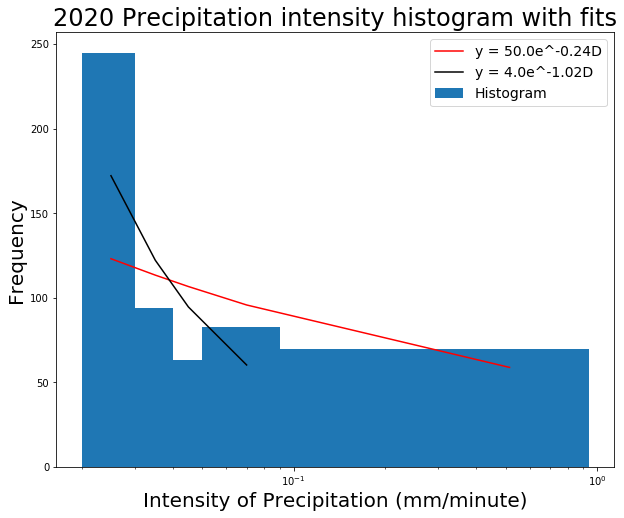

In [60]:
plt.figure(figsize = (10,8))
plt.bar(bin20_val_inten100, inten_hist20_100, np.diff(inten_bin20_edge100))
plt.xlabel('Intensity of Precipitation (mm/minute)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Precipitation intensity histogram with fits', fontsize = 24)
plt.plot(bin20_val_inten100, hist20_inten100_predict, color = 'r')
plt.plot(bin20_val_inten98, hist20_inten98_predict, color = 'k')
label_20_inten100 = 'y = ' + str(round(curve20_inten100[1])) + 'e^' + str(round(curve20_inten100[0],2)) + 'D'
label_20_inten98 = 'y = ' + str(round(curve20_inten98[1])) + 'e^' + str(round(curve20_inten98[0],2)) + 'D'
plt.legend(labels = [label_20_inten100, label_20_inten98, 'Histogram'], fontsize = 14)

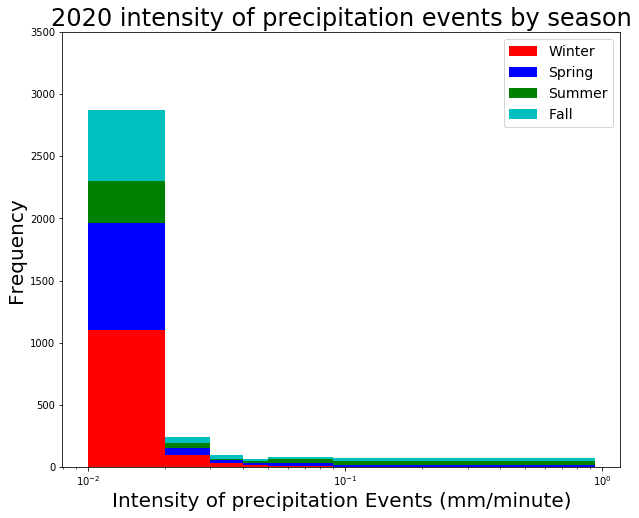

In [61]:
plt.figure(figsize = (10,8))
plt.hist([ Winten20, Sp_inten20, Su_inten20,Finten20], bins = int20_100, range= (int20_100.min(),int20_100.max()), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Intensity of precipitation Events (mm/minute)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,3500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 intensity of precipitation events by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
#plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
#plt.plot(int_bin_val_20, int_20coef[1]*np.exp(np.log(int_bin_val_20)*int_20coef[0]), color = 'k' )
plt.legend(labels = ['Winter','Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )